In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models import VAE
from MIDI import *

In [2]:
latent_dim = 12
arrdict_bars = np.load('data/output/magenta_full_23_12_64bpb_bars.npz', allow_pickle = True)
arrdict_tracks = np.load('data/output/magenta_full_23_12_64bpb_tracks.npz', allow_pickle = True)

#print(sorted([k for k in arrdict_tracks.keys()]))
nd = arrdict_bars['notedict'].item()
bars = arrdict_bars['bars']

In [3]:
vae = VAE(latent_dim, bars.shape[-2:], debug=True)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 64, 22)]     0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 64, 22, 1)    0           encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 22, 128)  512         reshape[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 11, 128)  0           conv2d[0][0]                     
____________________________________________________________________________________________

Train on 19525 samples, validate on 2170 samples
Epoch 1/10
19525/19525 [==============================] - 64s 3ms/sample - loss: 63.5593 - val_loss: 15.7591
Epoch 2/10
19525/19525 [==============================] - 62s 3ms/sample - loss: 11.4106 - val_loss: 12.8038
Epoch 3/10
19525/19525 [==============================] - 71s 4ms/sample - loss: 9.6786 - val_loss: 11.7360
Epoch 4/10
19525/19525 [==============================] - 73s 4ms/sample - loss: 8.8664 - val_loss: 11.1125
Epoch 5/10
19525/19525 [==============================] - 66s 3ms/sample - loss: 8.4542 - val_loss: 10.9032
Epoch 6/10
19525/19525 [==============================] - 68s 3ms/sample - loss: 8.1763 - val_loss: 10.6339
Epoch 7/10
19525/19525 [==============================] - 70s 4ms/sample - loss: 7.9914 - val_loss: 10.4503
Epoch 8/10
19525/19525 [==============================] - 62s 3ms/sample - loss: 7.8417 - val_loss: 10.2775
Epoch 9/10
19525/19525 [==============================] - 62s 3ms/sample - loss: 7.68

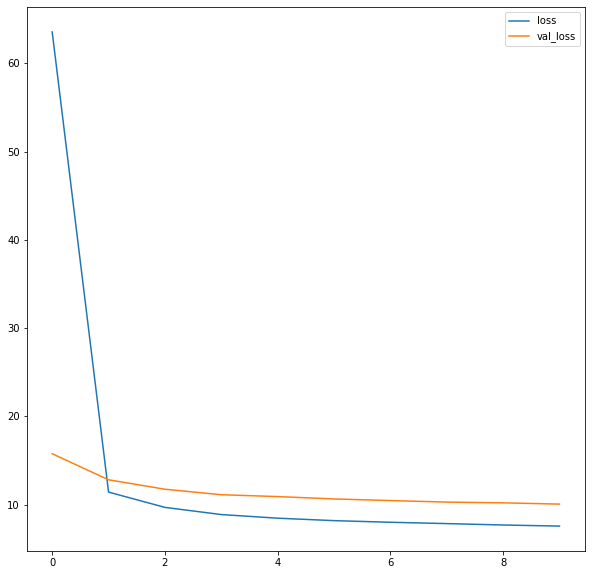

In [4]:
hist = vae.train(bars, 10, 200, validation_split=0.1)

plt.figure(figsize = (10,10))
for k in hist.history.keys():
    plt.plot(hist.history[k], label = k)
plt.legend()

In [5]:
import tensorflow as tf
tf.__version__

'2.0.0'

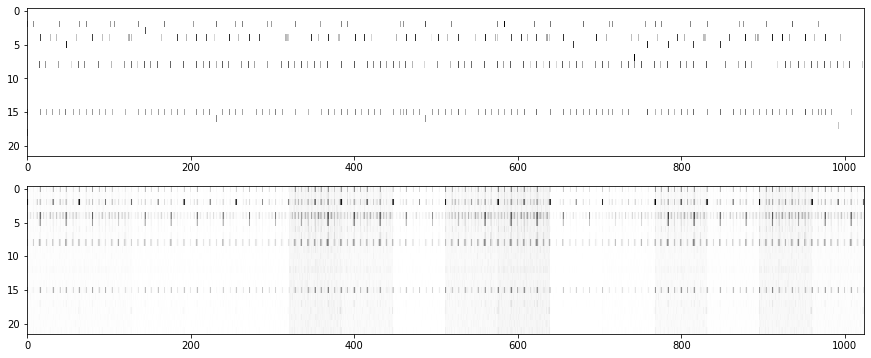

In [6]:
song = arrdict_tracks['drum grooves_magenta_drummer1_eval_session_1_funk-groove1_138_beat_4-4.mid']
song_pred = vae.VAE.predict(song)
song_pred.shape
writeBarArray(song_pred, 'data/dummy/test', nd)

fig, axes = plt.subplots(2,1, figsize = (15,6))
plt.gray()

axes[0].imshow(1 - np.concatenate(song).T, aspect = 'auto')
axes[1].imshow(1 - np.concatenate(song_pred).T, aspect = 'auto')